<a href="https://colab.research.google.com/github/Parisa-Foroutan/Tutorials/blob/main/ADMI821_Session7_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial 7: Recurrent Neural Networks

Link to Datasets: [AMZN_train](https://drive.google.com/file/d/1cVpK7WrUA2-tWQe73BPFE5C4CZ3gT3iO/view?usp=sharing), [AMZN_test](https://drive.google.com/file/d/1oK4pXOQeU-8SIRAvuB7j-1TdiF9DvvTr/view?usp=sharing)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Recurrent Neural Networks (LSTM)

##### Data Preprocessing
inputs of Keras can only be numpy arrays

In [4]:
dataset_train = pd.read_csv('/content/AMZN_train.csv')
# use column 'close' and convert it to np array
training_set = dataset_train.iloc[:, 4:5].values
len(training_set)

525

Feature Scaling

In [5]:
# normalize your data for RNN
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 30 timesteps and 1 output

In [6]:
# lag = 30, n_obs = 525
X_train = []
y_train = []
for i in range(30, 525):
  X_train.append(training_set_scaled[i-30:i, 0]) # upperbound not included
  y_train.append(training_set_scaled[i, 0])
X_train , y_train = np.array(X_train), np.array(y_train) # convert list to np array
X_train.shape

(495, 30)

Reshaping: anytime you want to add dimensions to np array, you can use reshape

In [7]:
# specify or add indicators(here 1, close price)
# keras documentation-> Recurrent Layers -> Input shape: (batch_size,timesteps,input_dim)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#### Building and Training the RNN

RNN architecture

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# return_sequences = True, because we want to add another LSTM layer after this
model.add(Dropout(rate=0.2)) # 20% of the neurans will be droped out during each training iteration

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding the last LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

Fitting the RNN to the Training set

In [9]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
16/16 [==============================] - 7s 50ms/step - loss: 0.1091
Epoch 2/100
16/16 [==============================] - 1s 47ms/step - loss: 0.0235
Epoch 3/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0133
Epoch 4/100
16/16 [==============================] - 1s 47ms/step - loss: 0.0113
Epoch 5/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0105
Epoch 6/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0092
Epoch 7/100
16/16 [==============================] - 1s 47ms/step - loss: 0.0096
Epoch 8/100
16/16 [==============================] - 1s 48ms/step - loss: 0.0106
Epoch 9/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0096
Epoch 10/100
16/16 [==============================] - 1s 46ms/step - loss: 0.0087
Epoch 11/100
16/16 [==============================] - 1s 47ms/step - loss: 0.0096
Epoch 12/100
16/16 [==============================] - 1s 48ms/step - loss: 0.0107
Epoch 13/100
16/16 [=====

##### Making the predictions and visualising the results

Getting the predicted stock price of Feb 2022:
we need to concatenate test set with training set (before normalization) to use 30 observation before Feb 2022.

In [10]:
# Test data
dataset_test = pd.read_csv('/content/AMZN_test.csv')
real_stock_price = dataset_test.iloc[:,4:5].values

data_set_total = pd.concat([dataset_train['Close'], dataset_test['Close']], axis = 0)
inputs = data_set_total[len(data_set_total)- len(dataset_test) - 30:].values
# reshape inputs to get a numpy array with rows and one column
inputs = inputs.reshape(-1,1)
# scale inputs (like what we did with training set)
inputs = sc.transform(inputs)
X_test = []
# test set contains 14 observations
for i in range (30,44):
  X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_stock_price = model.predict(X_test)
# rescale to original format
pred_stock_price = sc.inverse_transform(pred_stock_price)
MSE = np.mean(np.sum((pred_stock_price-real_stock_price)**2))

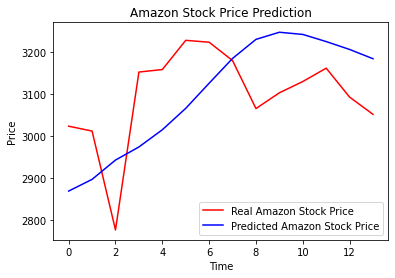

In [12]:
plt.plot(real_stock_price, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(pred_stock_price, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()